**Part 1 - Cross - Section Data**

Intialization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import f

column_names = [
    'price', 'crime', 'nox', 'rooms', 'dist', 'radial',
    'proptax', 'stratio', 'lowstat', 'lprice', 'lnox', 'lproptax'
]



df = pd.read_csv(
    'https://raw.githubusercontent.com/IbaDemesy/Econometrics-project/main/HPRICE2.raw',
    header=None,
    names=column_names,
    delim_whitespace=True
)


print(df.head())


   price  crime   nox  rooms  dist  radial  proptax  stratio  lowstat  \
0  24000  0.006  5.38   6.57  4.09       1     29.6     15.3     4.98   
1  21599  0.027  4.69   6.42  4.97       2     24.2     17.8     9.14   
2  34700  0.027  4.69   7.18  4.97       2     24.2     17.8     4.03   
3  33400  0.032  4.58   7.00  6.06       3     22.2     18.7     2.94   
4  36199  0.069  4.58   7.15  6.06       3     22.2     18.7     5.33   

      lprice      lnox  lproptax  
0  10.085810  1.682688  5.690360  
1   9.980402  1.545433  5.488938  
2  10.454500  1.545433  5.488938  
3  10.416310  1.521699  5.402678  
4  10.496790  1.521699  5.402678  


<ipython-input-773-9477ceff05ef>:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


Note that, in the following theoretical questions, we will refer to the dataset as the matrix $X$.


**Question 1** :

The fundamental hypothesis is that the error term is of zero conditional mean, i.e.
$$
E(u|X)  = 0
$$ and so $$ E(u) = 0$$
 $X$ is uncorrelated with $u$.

Where $u$, as said above, represents the error term in the linear model (you can see it in the next question).

In other words, what you observe is independent from what you don't observe.

**Question 2**

Consider the linear model:

$$
 y_i = \beta_0 + x_{i1}\beta_1 + x_{i2}\beta_2 + \ldots + x_{iK}\beta_K + u_i
$$

Defining $ y = (y_1, \ldots, y_n)^\prime $, $ x_k = (x_{1k}, \ldots, x_{nk})^\prime $, $u = (u_1, \ldots, u_n)^\prime $, we can write the model in matrix form:

$$ y = X\beta + u $$

with $ \beta = (\beta_1, \ldots, \beta_K)^\prime $ and $ X = [x_1, x_2, \ldots, x_K] $.

OLS estimates are obtained by solving the following minimization problem:

$$ \min_\beta \sum_{i=1}^{n} u_i^\prime u_i = u^\prime u = (y - X\beta)^\prime (y - X\beta) $$

So :

$$ -2X^\prime (y - X\beta) = 0 $$


Re-arranging terms:

$$ (X^\prime X)\beta = X^\prime y $$

If there is no multi-collinearity, then the matrix $ (X^\prime X) $ can be inverted :

$$ \hat{\beta} = (X^\prime X)^{-1}X^\prime y$$

This estimator is unbiased if the fundamental assumption (in matrix form) $ E(X^\prime u) = 0 $ is satisfied:

$$ E (\hat{\beta}) = E((X^\prime X)^{-1}X^\prime(X\beta + u)) = \beta + E(X^\prime u) = \beta $$


**Question 3**

Sample selection bias occurs when the sample studied is not representative of the entire population, leading to flawed conclusions. The famous example that we saw in the course is the survivorship bias during World War II.

Analysts in the Royal Air Force (RAF) examined returning aircraft to identify which parts were most frequently hit by enemy fire. They observed that areas like the wings and tail had the most bullet holes and initially suggested reinforcing these parts.

However, statisticians pointed out that this analysis ignored the aircraft that did not return. Planes that were shot down likely had critical damage in areas like the engines or cockpit, which were underrepresented in the sample. Therefore, the recommendation was to reinforce these vital areas, even if they showed fewer hits on surviving aircraft.

This example highlights how focusing only on "survivors" (aircraft that return) biases the analysis by excluding failures (aircraft that are lost). To avoid sample selection bias, it's essential to account for the entire population, including missing or unseen data.

**Question 4**

We have an omitted variable bias when we omit a variable that is correlated with the dependent variable.

In other words, when we leave out a viariable that matters for the dependent variable $y$.
For example, in the course we saw the omitted variable bias : we wanted to study the effect of fertilisers on crop yields. If a key factor, such as soil quality, is excluded from an analysis, it leads to distorted results.

Indeed, if more fertilizer is applied to high-quality soil plots, the analysis will incorrectly attribute the increase in yields entirely to the fertilizer, while part of the effect is due to soil quality. This bias arises because soil quality impacts both yields and the amount of fertilizer used.

To address this, plots should be randomly selected, and critical variables like soil quality should be included in the statistical model to accurately measure the true effect of the fertilizer.


**Question 5**

The multicollinearity problem arises when two or more columns of the matrix $ X $ are linearly dependent (or almost).

If so, the determinant of the matrix $ (X^\prime X) $ is zero or almost zero.

$$
det(X^\prime X) = 0
$$


In this case, the matrix $ (X^\prime X) $ is not invertible.
The OLS estimator cannot be computed.

A solution to this problem is to drop one of the linearly dependent columns or to add some observations to the dataset.

The dataset of the project does not have a multicollinearity problem because the determinant of the matrix $ (X^\prime X) $ is not equal to zero.

You can see that by computing the code below.

In [ ]:

# columns_name = ["price", "crime", "nox", "rooms", "dist", "radial", "proptax", "stratio", "lowstat", "lprice", "lnox", "lproptax"]
X = df[column_names]

print("Determinant of the matrix (X'X): ", np.linalg.det(X.T.dot(X)))

Determinant of the matrix (X'X):  4.0362932604189976e+42


**Question 6**

In [ ]:
# Calculate the percentiles for 'nox'
nox_percentiles = df['nox'].quantile([0.25, 0.75])

# Create the categories
conditions = [
    (df['nox'] <= nox_percentiles[0.25]),  # Low : <= 25%
    (df['nox'] > nox_percentiles[0.25]) & (df['nox'] < nox_percentiles[0.75]),  # High : between 26% and 74%
    (df['nox'] >= nox_percentiles[0.75])  # High: >= 75%
]






**Question 7**

In [ ]:
#Q7

#Get the prices for each category
low = df.loc[conditions[0], 'price']
medium = df.loc[conditions[1], 'price']
high = df.loc[conditions[2], 'price']

mean_low = low.mean()
mean_medium = medium.mean()
mean_high = high.mean()


print("Moyenne du prix par catégorie de 'nox':")
print(f"Low: {mean_low}")
print(f"Medium: {mean_medium}")
print(f"High: {mean_high}")

Moyenne du prix par catégorie de 'nox':
Low: 26977.09375
Medium: 23127.117647058825
High: 17382.157142857144


To comment on the results, we can say that, on average, the higher the nox (concentration of nitrogen oxides), the lower the price of the home.

This is to be expected, because the higher the pollution, the lower the quality of life.

**Question 8**

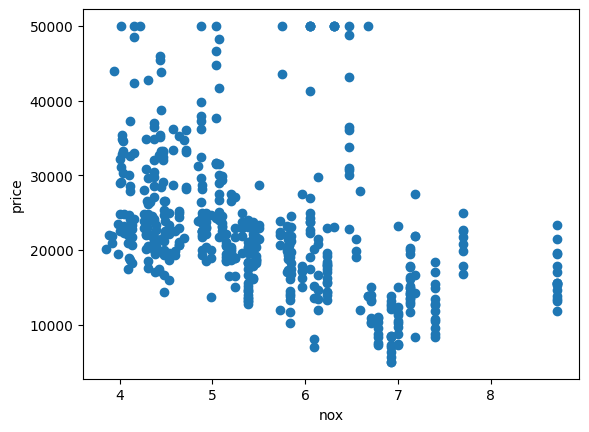

In [ ]:

plt.figure(1)
plt.ylabel('price')
plt.xlabel('nox')
plt.scatter(df['nox'],df['price'])
plt.show()


Ceteris paribus is a concept used in statistical analysis where the effect of a single variable is examined while keeping all other variables constant.

A scatter plot alone cannot demonstrate a ceteris paribus effect, because, a scatter plot shows the relationship between two variables, such as 'price' and 'nox', but it doesn't account for the influence of other variables.

To assess the ceteris paribus effect, we have to use regression analysis, where we can control for the impact of other variables and isolate the specific effect of 'nox' on 'price' while holding other factors constant.

So, what we can do is to ensure that the relationship between the variable of interest and the dependent variable appears linear in the scatterplot.

If the relationship is non-linear, the ceteris paribus assumption might be violated, like in our case.

**Question 9**

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     169.6
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.06e-91
Time:                        22:37:26   Log-Likelihood:                -5119.6
No. Observations:                 506   AIC:                         1.025e+04
Df Residuals:                     501   BIC:                         1.027e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.868e+04   3215.205     -5.811      0.0

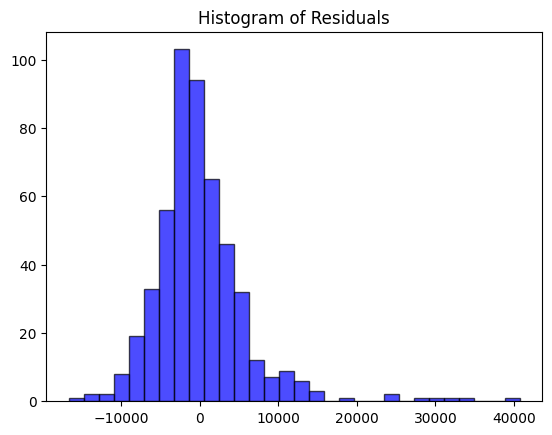

In [ ]:

X = df[['crime', 'nox', 'rooms', 'proptax']]
y = df['price']

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())


residuals = results.resid
plt.figure(2)
plt.hist(residuals, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.show()




- The histogram of residuals is weighted more towards the left. As the distribution is not normal centred at 0, the model does not seem to fit.

- The coefficient of crime is negative, which means that the higher the crime rate, the lower the price.
- The coefficient of nox is negative, which means that the higher the nox, the lower the price.
- The coefficient of rooms is positive, which means that the higher the number of rooms, the higher the price.
- The coefficient of proptax is negative, which means that the higher the proptax, the lower the price.

**Question 10**

In [ ]:

X = df[['crime', 'nox', 'rooms', 'proptax']]
y = df['lprice']

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())




                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     196.9
Date:                Sun, 08 Dec 2024   Prob (F-statistic):          2.50e-101
Time:                        22:37:27   Log-Likelihood:                -26.367
No. Observations:                 506   AIC:                             62.73
Df Residuals:                     501   BIC:                             83.87
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6550      0.137     63.320      0.0


- The coefficient of crime is negative. This means that the higher the crime rate, the lower the price of the house.
- The coefficient of nox is negative. This means that the higher the nox, the lower the price of the house.
- The coefficient of rooms is positive. This means that the more rooms, the higher the price of the house.
- The coefficient of proptax is negative. This means that the higher the proptax, the lower the price of the house.
- The coefficient of the constant is positive. This means that the price of the house is positive even when all the other variables are 0.

We can notice that all the coefficients are significant.

**Question 11**

In [ ]:
X = df[['crime', 'lnox', 'rooms', 'lproptax']]
y = df['lprice']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())




                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     197.4
Date:                Sun, 08 Dec 2024   Prob (F-statistic):          1.77e-101
Time:                        22:37:27   Log-Likelihood:                -26.021
No. Observations:                 506   AIC:                             62.04
Df Residuals:                     501   BIC:                             83.18
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7505      0.253     38.476      0.0


- The coefficient of crime is negative. This means that the higher the crime rate, the lower the price of the house.
- The coefficient of lnox is negative. This means that the higher the nox, the lower the price of the house.
- The coefficient of rooms is positive. This means that the more rooms, the higher the price of the house.
- The coefficient of lproptax is negative. This means that the higher the proptax, the lower the price of the house.

We can notice the fact that all the coefficients are significant.

**Question 12**

In [ ]:
X = df[['crime', 'nox', 'rooms', 'proptax']]
y = df['price']

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

# Extract the p-value for nox
p_value_nox = results.pvalues['nox']

print(f"P-value for 'nox': {p_value_nox:.4f}")

# Checking at the 1% significance level
alpha = 0.01
if p_value_nox < alpha:
    print("We reject H0: the coefficient for 'nox' is statistically significant at the 1% level.")
else:
    print("We fail to reject H0: the coefficient for 'nox' is not statistically significant at the 1% level.")


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     169.6
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.06e-91
Time:                        22:37:27   Log-Likelihood:                -5119.6
No. Observations:                 506   AIC:                         1.025e+04
Df Residuals:                     501   BIC:                         1.027e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.868e+04   3215.205     -5.811      0.0

**Question 13**

In order to perform this test, we define the variable $\theta = \beta_{crime} - \beta_{proptax}$. Then, we test the hypothesis H0: $\theta = 0$ vs. H1: $\theta ≠ 0$ at the 10% level.

Starting from the X of question 9:
$$
X_{question9} = \beta_0 + \beta_{crime} * crime + \beta_{nox} * nox + \beta_{rooms} * rooms + \beta_{proptax} * proptax + \epsilon
$$
$$
\theta = \beta_{crime} - \beta_{proptax}
$$
and so:
$$
\beta_{crime} = \theta + \beta_{proptax}
$$
Rewriting $X_{question9}$ in terms of $\theta$:
$$
X_{question9} = \beta_0 + (\theta + \beta_{proptax}) * crime + \beta_{nox} * nox + \beta_{rooms} * rooms + \beta_{proptax} * proptax + \epsilon
$$
$$
X_{question9} = \beta_0 + \theta * crime + \beta_{proptax} * crime + \beta_{nox} * nox + \beta_{rooms} * rooms + \beta_{proptax} * proptax + \epsilon
$$
Finally, we can rewrite $X_{question9}$ in order to answer the question:
$$
X = \beta_0 + \theta * crime + \beta_{nox} * nox + \beta_{rooms} * rooms + \beta_{proptax} * (crime + proptax) + \epsilon
$$

In [ ]:
# create X and y
crime = df["crime"]
proptax = df["proptax"]
nox = df["nox"]
rooms = df["rooms"]
price = df["price"]

X = np.column_stack((crime, nox, rooms, proptax + crime))
y = price

# add constant
X = sm.add_constant(X)

# fit model
model = sm.OLS(y, X).fit()

# print summary
print(model.summary())

alpha = 0.1
variable = "x1"  # this will be our theta

print("p_value: ", model.pvalues[variable])

print("Reject H_0 ?", model.pvalues[variable] < alpha)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     169.6
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.06e-91
Time:                        22:37:27   Log-Likelihood:                -5119.6
No. Observations:                 506   AIC:                         1.025e+04
Df Residuals:                     501   BIC:                         1.027e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.868e+04   3215.205     -5.811      0.0

**Question 14**

In [ ]:
# Specification from question 9
X = df[['crime', 'nox', 'rooms', 'proptax']] # This is the full model
y = df['price']
X = sm.add_constant(X)  # This adds the constant to the full model, previously called "X_full" in Q9
model = sm.OLS(y, X)
results = model.fit()

# Restricted model (impose βnox = 0 and βproptax = 0)
X_restricted = sm.add_constant(df[['crime', 'rooms']])  # Exclude 'nox' and 'proptax'
model_restricted = sm.OLS(y, X_restricted).fit()
SSR_restricted = np.sum(model_restricted.resid**2)

# Number of observations and parameters
n = X.shape[0]  # X was the full model's dataframe in Q9, previously called "X_full"
k_full = X.shape[1]
k_restricted = X_restricted.shape[1]

# F-statistic
SSR_full = np.sum(results.resid**2)  # Define SSR_full based on the full model
F_stat = ((SSR_restricted - SSR_full) / (k_full - k_restricted)) / (SSR_full / (n - k_full))

# p-value for the F-test
p_value_F = f.sf(F_stat, k_full - k_restricted, n - k_full)

# Display results
print(f"F-statistic: {F_stat}")
print(f"p-value: {p_value_F}")

# Hypothesis test
alpha = 0.10
if p_value_F < alpha:
    print("Reject H0: The coefficients of 'nox' and 'proptax' are significantly different from zero.")
else:
    print("Fail to reject H0: The coefficients of 'nox' and 'proptax' are not significantly different from zero.")

F-statistic: 19.31129034955289
p-value: 8.332525004918138e-09
Reject H0: The coefficients of 'nox' and 'proptax' are significantly different from zero.


**Question 15**

In [ ]:
# Full model (unrestricted)
X = df[['crime', 'rooms']]
y = df['lprice']
X = sm.add_constant(X)

model_unrestricted = sm.OLS(y, X).fit()
df_u = model_unrestricted.df_resid
SSR0 = model_unrestricted.ssr

# Restricted model (transformed y)
y_transformed = df['lprice'] + 500 * df['nox'] + 100 * df['proptax']
model_restricted = sm.OLS(y_transformed, X).fit()
df_r = model_restricted.df_resid
SSR1 = model_restricted.ssr

# F-statistic and p-value
q = df_u - df_r
F_stat = ((SSR1 - SSR0) / q) / (SSR0 / df_u)
print("\nF-statistic:", F_stat)

p_val = f.sf(F_stat, q, df_u)
print("\np-value:", p_val)

# Hypothesis test with additional check
alpha = 0.10
if not np.isnan(p_val):
    print("\nReject H_0 ?", p_val < alpha)
else:
    print("\Reject H_0.")



F-statistic: inf

p-value: nan
\Reject H_0.


<ipython-input-784-c0269ff6839c>:18: RuntimeWarning: divide by zero encountered in scalar divide
  F_stat = ((SSR1 - SSR0) / q) / (SSR0 / df_u)


Note : F-statistic seems to be extremely high so detected as a divide by zero. p-value is very close to zero so the hypothesis H0 is rejected.

**Question 16**

In [ ]:
# Create subsets for each group
df_low = df[conditions[0]]
df_medium = df[conditions[1]]
df_high = df[conditions[2]]

# Add a constant
X_low = sm.add_constant(df_low[['crime', 'nox', 'rooms', 'proptax']])
X_medium = sm.add_constant(df_medium[['crime', 'nox', 'rooms', 'proptax']])
X_high = sm.add_constant(df_high[['crime', 'nox', 'rooms', 'proptax']])

y_low = df_low['price']
y_medium = df_medium['price']
y_high = df_high['price']

# Perform regressions for each group
model_low = sm.OLS(y_low, X_low).fit()
model_medium = sm.OLS(y_medium, X_medium).fit()
model_high = sm.OLS(y_high, X_high).fit()

# Calculate residuals and SSR for each model
SSR_low = np.sum(model_low.resid**2)
SSR_medium = np.sum(model_medium.resid**2)
SSR_high = np.sum(model_high.resid**2)

# Calculate the SSR for the unrestricted model (all data pooled)
X_pooled = sm.add_constant(df[['crime', 'nox', 'rooms', 'proptax']])
y_pooled = df['price']
model_pooled = sm.OLS(y_pooled, X_pooled).fit()
SSR_pooled = np.sum(model_pooled.resid**2)

# Calculate the F-statistic
num_restrictions = (len(model_pooled.params) - 1) * (3 - 1)  # (k-1)*(g-1) where k = num of params, g = num of groups
F_stat = ((SSR_pooled - (SSR_low + SSR_medium + SSR_high)) / num_restrictions) / \
         ((SSR_low + SSR_medium + SSR_high) / (len(df) - len(model_pooled.params) * 3))  # df2 = n - kg

# Calculate the p-value of the F-statistic
p_value = f.sf(F_stat, num_restrictions, len(df) - len(model_pooled.params) * 3)

# Print the results of the test
print(f"F-statistic: {F_stat}")
print(f"p-value: {p_value}")

# Test the hypothesis
alpha = 0.10  # Significance level of 10%

if p_value < alpha:
    print("We reject H0: The coefficients are significantly different between the groups.")
else:
    print("We fail to reject H0: The coefficients are not significantly different between the groups.")

F-statistic: 15.306882443526305
p-value: 3.8401368450633154e-20
We reject H0: The coefficients are significantly different between the groups.


**Question 17**

In [ ]:
df_low = df[conditions[0]]
df_medium = df[conditions[1]]
df_high = df[conditions[2]]

X_low = sm.add_constant(df_low[['crime', 'nox', 'rooms', 'proptax']])
X_medium = sm.add_constant(df_medium[['crime', 'nox', 'rooms', 'proptax']])
X_high = sm.add_constant(df_high[['crime', 'nox', 'rooms', 'proptax']])

y_low = df_low['price']
y_medium = df_medium['price']
y_high = df_high['price']

model_low = sm.OLS(y_low, X_low).fit()
model_medium = sm.OLS(y_medium, X_medium).fit()
model_high = sm.OLS(y_high, X_high).fit()

# Calculate the SSR for the unrestricted model (sum of SSRs from individual group regressions)
SSR_unrestricted = np.sum(model_low.resid**2) + np.sum(model_medium.resid**2) + np.sum(model_high.resid**2)


# Perform restricted regression (assuming crime and rooms coefficients are the same)
# Create interaction terms for nox and proptax with group dummies
df['group_medium'] = np.where(conditions[1], 1, 0)
df['group_high'] = np.where(conditions[2], 1, 0)
df['nox_medium'] = df['nox'] * df['group_medium']
df['nox_high'] = df['nox'] * df['group_high']
df['proptax_medium'] = df['proptax'] * df['group_medium']
df['proptax_high'] = df['proptax'] * df['group_high']

# Define restricted model with interaction terms
X_restricted = sm.add_constant(df[['crime', 'nox', 'rooms', 'proptax',
                                     'nox_medium', 'nox_high',
                                     'proptax_medium', 'proptax_high']])
y_restricted = df['price']
model_restricted = sm.OLS(y_restricted, X_restricted).fit()
SSR_restricted = np.sum(model_restricted.resid**2)

# Calculate the F-statistic
num_restrictions = 2 * (3 - 1)  # 2 coefficients (nox, proptax) with (g-1) restrictions
F_stat = ((SSR_restricted - SSR_unrestricted) / num_restrictions) / \
         (SSR_unrestricted / (len(df) - (len(model_low.params) * 3)))

# Calculate the p-value of the F-statistic
p_value = f.sf(F_stat, num_restrictions, len(df) - (len(model_low.params) * 3))

# Print the results of the test
print(f"F-statistic: {F_stat}")
print(f"p-value: {p_value}")

# Test the hypothesis
alpha = 0.10  # Significance level of 10%

if p_value < alpha:
    print("We reject H0: The coefficients of 'nox' and 'proptax' are significantly different between the groups.")
else:
    print("We fail to reject H0: The coefficients of 'nox' and 'proptax' are not significantly different between the groups.")

F-statistic: 29.917094933344636
p-value: 2.7316986590533234e-22
We reject H0: The coefficients of 'nox' and 'proptax' are significantly different between the groups.


# **Part 2**

**Question 18**

Heteroskedasticity arises when the variance of the error term is not constant across observations, meaning that the variability of errors differs depending on the data points. This violates the assumption of homoskedasticity, a key condition of the classical linear regression model. As a result, the OLS estimator is no longer BLUE (Best Linear Unbiased Estimator), as it loses efficiency.

For example, in class, we examined how house prices relate to different factors. When predicting house prices with a model, the difference between the predicted and actual prices (the errors) may vary significantly as house sizes increase. Predictions for smaller houses tend to be more consistent, but larger houses often exhibit greater variability in prediction errors. This variability conflicts with the OLS assumption of constant error variance, complicating its application.

**Note: for all the questions 19, 20 and 21 that follow, we set alpha = 0.01 (to be in line with the value seen in practical work).**

**Question 19**

In [ ]:
#Q19


X = df[['crime', 'nox', 'rooms', 'proptax']]
y = df['price']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

u=results.resid
u2=u*u
y=u2
model=sm.OLS(y,X)
results = model.fit()
print(results.summary())

# Décision sur H0 (absence d'hétéroscédasticité)
alpha = 0.01  # Niveau de significativité
p_values = results.pvalues  # P-valeurs des coefficients

# Exclusion de la constante (on teste uniquement les variables explicatives)
p_values_explanatory = p_values[1:]  # Exclure la p-value de la constante

# Test H0 pour chaque coefficient
reject_H0 = any(p < alpha for p in p_values_explanatory)

if reject_H0:
    print("On rejette H0 : il y a une forme d'hétéroscédasticité.")
else:
    print("On ne rejette pas H0 : il n'y a pas d'hétéroscédasticité détectée.")



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     6.799
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           2.47e-05
Time:                        22:37:27   Log-Likelihood:                -10130.
No. Observations:                 506   AIC:                         2.027e+04
Df Residuals:                     501   BIC:                         2.029e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.885e+07   6.41e+07     -0.917      0.3

**Question 20**


In [ ]:
#Q20
X = df[['crime', 'nox', 'rooms', 'proptax']]
y = df['lprice']

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

u=results.resid
u2=u*u
y=u2
model=sm.OLS(y,X)
results = model.fit()
print(results.summary())

# Décision sur H0 (absence d'hétéroscédasticité)
alpha = 0.01  # Niveau de significativité
p_values = results.pvalues  # P-valeurs des coefficients

# Exclusion de la constante (on teste uniquement les variables explicatives)
p_values_explanatory = p_values[1:]  # Exclure la p-value de la constante

# Test H0 pour chaque coefficient
reject_H0 = any(p < alpha for p in p_values_explanatory)

if reject_H0:
    print("On rejette H0 : il y a une forme d'hétéroscédasticité.")
else:
    print("On ne rejette pas H0 : il n'y a pas d'hétéroscédasticité détectée.")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     17.98
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           8.33e-14
Time:                        22:37:27   Log-Likelihood:                 185.10
No. Observations:                 506   AIC:                            -360.2
Df Residuals:                     501   BIC:                            -339.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0757      0.090      0.842      0.4

**Question 21**

In [ ]:
#Q21
X = df[['crime', 'lnox', 'rooms', 'lproptax']]
y = df['lprice']

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

u=results.resid
u2=u*u
y=u2
model=sm.OLS(y,X)
results = model.fit()
print(results.summary())

# Décision sur H0 (absence d'hétéroscédasticité)
alpha = 0.01  # Niveau de significativité
p_values = results.pvalues  # P-valeurs des coefficients

# Exclusion de la constante (on teste uniquement les variables explicatives)
p_values_explanatory = p_values[1:]  # Exclure la p-value de la constante

# Test H0 pour chaque coefficient
reject_H0 = any(p < alpha for p in p_values_explanatory)

if reject_H0:
    print("On rejette H0 : il y a une forme d'hétéroscédasticité.")
else:
    print("On ne rejette pas H0 : il n'y a pas d'hétéroscédasticité détectée.")



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     16.51
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.02e-12
Time:                        22:37:27   Log-Likelihood:                 184.66
No. Observations:                 506   AIC:                            -359.3
Df Residuals:                     501   BIC:                            -338.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5496      0.167     -3.289      0.0

**Question 22**

Heteroscedasticity is observed consistently across all the questions analyzed.

The primary transformation applied between questions was the use of logarithms, to reduce the impact of heteroscedasticity. However, this approach did not completely eliminate the issue.








**Question 23**

In [ ]:
# Régression initiale (question 9)
X = df[['crime', 'nox', 'rooms', 'proptax']]
y = df['price']

X = sm.add_constant(X)
# Modèle OLS
model_ols = sm.OLS(y, X)
results_ols = model_ols.fit()

# Résidus au carré
u2 = results_ols.resid ** 2

# Régression des résidus au carré pour identifier la variable causant l'hétéroscédasticité
X_with_const = sm.add_constant(X)
model_resid = sm.OLS(u2, X_with_const)
results_resid = model_resid.fit()

# Identifier la variable la plus significative
p_values = results_resid.pvalues[1:]  # Exclure la constante
most_significant_var = p_values.idxmin()  # Variable avec la plus petite p-value
print(f"La variable la plus significative est : {most_significant_var}")

# Régression WLS en utilisant la variable identifiée comme poids
weights = 1 / df[most_significant_var]  # Inverse de la variable comme poids
model_wls = sm.WLS(y, X, weights=np.sqrt(weights))
results_wls = model_wls.fit()

# Comparaison des erreurs standards
comparison = {
    "OLS Standard Errors": results_ols.bse,
    "WLS Standard Errors": results_wls.bse,
}
print("Comparaison des erreurs standards :")
print(comparison)

# Résumé des résultats WLS
print(results_wls.summary())

La variable la plus significative est : proptax
Comparaison des erreurs standards :
{'OLS Standard Errors': const      3215.204520
crime        38.528570
nox         314.633813
rooms       404.345434
proptax      23.965587
dtype: float64, 'WLS Standard Errors': const      3013.538749
crime        41.299213
nox         295.808578
rooms       376.315278
proptax      23.544293
dtype: float64}
                            WLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.628
Model:                            WLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     211.2
Date:                Sun, 08 Dec 2024   Prob (F-statistic):          4.82e-106
Time:                        22:37:27   Log-Likelihood:                -5087.7
No. Observations:                 506   AIC:                         1.019e+04
Df Residuals:                     501   BIC:          

- We can see in the first OLS summary that the variable with the lowest student statistics, hence the most responsible for heteroskedasticity is the variable 'proptax'. We used it as a weight in the WLS regression.

- The reduction in standard errors suggests that WLS has effectively corrected for the impact of non-constant variance. However, the reduction in error for proptax is marginal, indicating that heteroskedasticity has not been completely eliminated. In summary, WLS improves the reliability of the estimates, but the choice of weight (here based on proptax) may still influence the results.
Heteroscedasticity may not be fully captured by the inverse of proptax as a weight.

### Part 3

Initilization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import f
from statsmodels.tsa.stattools import adfuller
df = pd.read_excel(
    'https://raw.githubusercontent.com/IbaDemesy/Econometrics-project/main/threecenturies_v2.3.xlsx',
    sheet_name="A1. Headline series",
    usecols=[1, 15, 28]
)

realGDP = df.iloc[246:347, 0].reset_index(drop=True)
unemployment = df.iloc[246:347, 1].reset_index(drop=True)
inflation = df.iloc[246:347, 2].reset_index(drop=True)

df = pd.DataFrame(
    {"realGDP": realGDP, "unemployment": unemployment, "inflation": inflation}
)
print(df)


           realGDP unemployment inflation
0    181160.264436     3.679865  4.058273
1    184974.529384     4.877351      -0.3
2    187756.550527     5.145694         0
3     186015.76815     5.603507   1.10331
4    188155.559259     6.914821 -0.396825
..             ...          ...       ...
96         1243709     8.097052  2.400308
97         1282602     6.972014  1.824606
98         1323527     6.255467  1.557398
99         1366983     5.976813   1.32871
100        1418176     5.459049  0.796456

[101 rows x 3 columns]


**Question 24**

In the context of time series, a process is said to be strictly stationary if the joint distribution of $X_{t_1}, X_{t_2}, \dots, X_{t_j}$ is the same as the joint distribution of $X_{t_1+h}, X_{t_2+h}, \dots, X_{t_j+h}$ for all $j$ and all $h>0$ where h is an integer.

A process is weakly stationary if the mean and variance of $X_t$ are constant over time and the covariance between $X_t$ and $X_{t+h}$ is a function depending only on $h$ (i.e. the covariance is only a function of the time distance between the two distinct observations). We assume that the first and the second moment exist in this case.

In other words, it doesn't depend on the time at which the observations are taken.



**Question 25**

- Ergodicity is a property of stochastic processes where time averages along a single trajectory converge to ensemble averages (the statistical averages over all possible trajectories). In other words, for an ergodic process, observing one sufficiently long trajectory is enough to infer the overall behavior of the system. A process is ergodic if it is strictly stationary (its statistical properties, such as mean and variance, do not change over time) and if the influence of initial conditions disappears over time.

- The ergodic theorem states that for such processes, the time average of a function $f(X_{t})$ of the process $X_{t}$ converges almost surely to its expected value $$E[f(X_{t})]$$.


- An example of ergodicity is flipping a fair coin repeatedly. If you observe the outcome of a single coin (e.g., heads or tails) over a long series of flips, the proportion of heads (time average) will converge to the probability of heads (ensemble average), which is 0.5. This happens because each flip is independent, and the process is stationary : its statistical properties do not change over time.

**Question 26**

Stationarity and ergodicity are crucial for time series analysis as they ensure model consistency (and its reliability).

Stationarity guarantees that statistical properties (such as mean, variance, autocorrelation) remain constant over time, preventing spurious regressions caused by irrelevant trends.

Ergodicity allows a single time series to represent the system's overall behavior by linking time averages to ensemble averages. Without these properties, predictions can require adjustments.

**Question 27**

Spurious regression refers to a situation where two non-stationary time series appear to be significantly related in a regression, even though there is no real relationship between them.

 It typically occurs when the series have common trends or drifts, causing high correlationnresults that are not meaningful.

 To avoid spurious regression, economists have to check for stationarity and even sometimes to transform the data before making the regression.

**Question 28**

In [ ]:
df_mavg_2x10 = df.copy()

for column in df.columns:
    data = df[column].to_numpy()
    n = len(data)
    mavg = np.zeros(n)

    for t in range(n):
        if 5 <= t < n - 5:
            mavg[t] = (
                (1/20) * data[t - 5]
                + (1/20) * data[t + 5]
                + (1/10) * np.sum(data[t - 4 : t + 5])
            )
        else:
            # Replace NaN with the mean of the column
            mavg[t] = np.nanmean(data)

    df_mavg_2x10[column] = mavg

# Compute the stationary time series by subtracting the moving average
df_stationary_2x10 = df - df_mavg_2x10

print(df_stationary_2x10)

           realGDP unemployment inflation
0   -344015.551821    -1.717574 -0.367203
1   -340201.286873    -0.520088 -4.725476
2    -337419.26573    -0.251745 -4.425476
3   -339160.048107     0.206068 -3.322166
4   -337020.256998     1.517383 -4.822301
..             ...          ...       ...
96   718533.183743     2.699613 -2.025168
97   757426.183743     1.574575  -2.60087
98   798351.183743     0.858028 -2.868079
99   841807.183743     0.579374 -3.096766
100  893000.183743      0.06161  -3.62902

[101 rows x 3 columns]


For a moving average of order 2x10 it gives the formula:

$$Y_t = \frac{1}{20}X_{t-5}\ + \frac{1}{20}X_{t+5}\ + \frac{1}{10}\sum_{i=-4}^{4} X_{t-i}$$


**Question 29**

In [ ]:

# Perform the ADF test on each column in the DataFrame
for column in df.columns:
    print(f"Performing ADF Test for '{column}'...")

    # Determine the regression type based on the column
    regression_type = "ctt" if column == "realGDP" else "c"

    # Perform the ADF test
    result = adfuller(df[column], maxlag=1, regression=regression_type)
    adf_stat = result[0]
    p_value = result[1]
    crit_value_5 = result[4]["5%"]

    # Print the results
    print(f"ADF Statistic: {adf_stat}")
    print(f"p-value: {p_value}")
    print(f"Critical Value at 5%: {crit_value_5}")

    # Interpretation
    if adf_stat < crit_value_5:
        print("Conclusion: Reject H0 - The time series is stationary.\n")
    else:
        print("Conclusion: Failed to Reject H0 - The time series is non-stationary.\n")

Performing ADF Test for 'realGDP'...
ADF Statistic: -3.7862421043764902
p-value: 0.0564774255916942
Critical Value at 5%: -3.893439799803978
Conclusion: Failed to Reject H0 - The time series is non-stationary.

Performing ADF Test for 'unemployment'...
ADF Statistic: -2.363202931618558
p-value: 0.1523925094574955
Critical Value at 5%: -2.891208211860468
Conclusion: Failed to Reject H0 - The time series is non-stationary.

Performing ADF Test for 'inflation'...
ADF Statistic: -4.0503591672558334
p-value: 0.001168599408868895
Critical Value at 5%: -2.891208211860468
Conclusion: Reject H0 - The time series is stationary.



**Question 30**

In [ ]:
# Create a copy to store the transformed data
df_stationary_2x10 = df.copy()

for column in df.columns:
    data = df[column].to_numpy()
    n = len(data)
    mavg = np.zeros(n)

    for t in range(n):
        if 5 <= t < n - 5:
            mavg[t] = (
                (1/20) * data[t - 5]
                + (1/20) * data[t + 5]
                + (1/10) * np.sum(data[t - 4 : t + 5])
            )
        else:
            # Replace NaN with the mean of the column
            mavg[t] = np.nanmean(data)

    # Subtract the calculated moving average from the original data
    df_stationary_2x10[column] = df[column] - mavg

print(df_stationary_2x10)

           realGDP unemployment inflation
0   -344015.551821    -1.717574 -0.367203
1   -340201.286873    -0.520088 -4.725476
2    -337419.26573    -0.251745 -4.425476
3   -339160.048107     0.206068 -3.322166
4   -337020.256998     1.517383 -4.822301
..             ...          ...       ...
96   718533.183743     2.699613 -2.025168
97   757426.183743     1.574575  -2.60087
98   798351.183743     0.858028 -2.868079
99   841807.183743     0.579374 -3.096766
100  893000.183743      0.06161  -3.62902

[101 rows x 3 columns]


**Question 31**

The ACF (Autocorrelation Function) measures the correlation between values of a time series at different lags, taking into account all past dependencies, including the influence of intermediate lags. For example, the ACF at a lag of 2 considers the relationship between values at time $t$ and $t-2$, but also incorporates the effect of  $t-1$. It is useful for detecting the overall dependency structure of a series.

On the other hand, the PACF (Partial Autocorrelation Function) measures the direct correlation between two values at a given lag, after removing the influence of intermediate lags. For example, the PACF at a lag of 2 measures the direct relationship between $t$ and $t-2$, controlling for the effect of $t-1$.

 So, the ACF shows the overall dependence structure of a series, while the PACF captures the direct dependencies between values at a specific lag.

**Question 32**

- GDP:

 The ACF (Autocorrelation Function) plot for GDP indicates that lag 1 is highly significant, while lags 2, 10, and 11 also show significance, though they are very close to the threshold. A slight seasonal pattern is also observable in the ACF plot.

 The PACF (Partial Autocorrelation Function) plot highlights lag 1 as the most significant, with lags 5 and 9 being marginally significant, near the significance threshold. Based on these observations, an MA(1) model appears to be a reasonable choice. Alternatively, an ARMA(1,1) model could be considered for modeling the GDP series.

- Unemployment:

  The ACF plot for the unemployment rate reveals minimal autocorrelation, indicating that the data behaves like white noise or a stationary random walk. As a result, models such as AutoRegressive (AR) or Moving Average (MA) are not suitable for predicting this series.

- Inflation:

  Similarly, the ACF plot for the inflation rate shows little to no significant autocorrelation, suggesting that the data resembles random noise or a stationary walk, much like the unemployment rate. Therefore, using models like AutoRegressive (AR) or Moving Average (MA) for forecasting inflation is not appropriate.

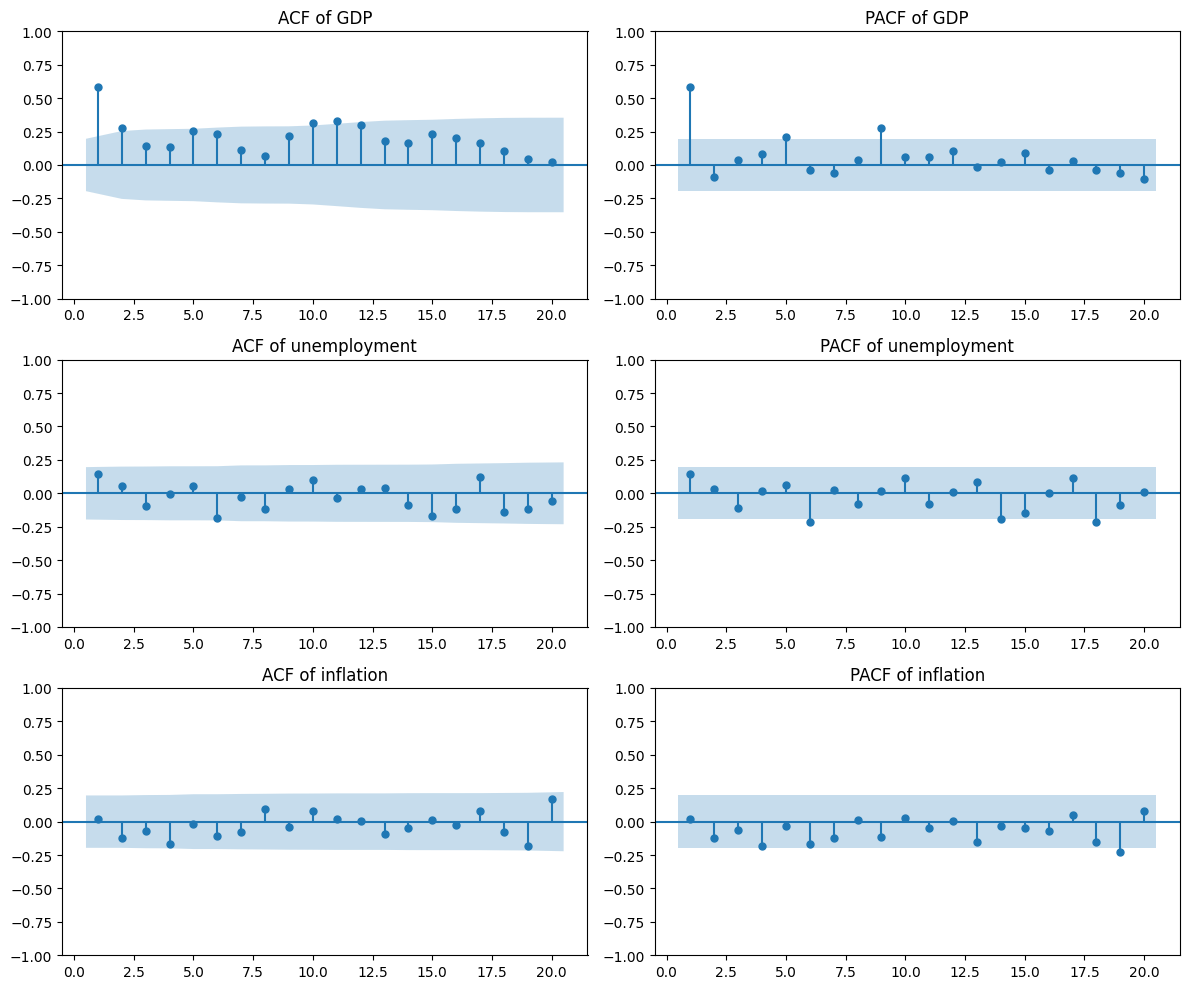

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas explicitly

# Calculate the differences for each variable
dl_GDP = np.diff(df["realGDP"])
dl_unemployment = np.diff(df["unemployment"])
dl_inflation = np.diff(df["inflation"])

# Adjust the indices for the differenced series to match the original series
dl_GDP = pd.Series(dl_GDP, index=df.index[1:])  # Use pandas Series
dl_unemployment = pd.Series(dl_unemployment, index=df.index[1:])
dl_inflation = pd.Series(dl_inflation, index=df.index[1:])

# Create the plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

plot_acf(dl_GDP, title="ACF of GDP", ax=axes[0, 0], lags=20, zero=False)  # Add zero=False
plot_pacf(dl_GDP, title="PACF of GDP", ax=axes[0, 1], lags=20, zero=False)

plot_acf(dl_unemployment, title="ACF of unemployment", ax=axes[1, 0], lags=20, zero=False)
plot_pacf(dl_unemployment, title="PACF of unemployment", ax=axes[1, 1], lags=20, zero=False)

plot_acf(dl_inflation, title="ACF of inflation", ax=axes[2, 0], lags=20, zero=False)
plot_pacf(dl_inflation, title="PACF of inflation", ax=axes[2, 1], lags=20, zero=False)

# Adjust the spacing between the plots
plt.tight_layout()
plt.show()

**Question 33**

The principle of parsimony suggests that a model or theory should be as simple as possible while adequately explaining the data. It favors the idea that, among several possible explanations, the one requiring the fewest assumptions is generally considered as the best. This principle is linked to Ockham's razor, which states that when faced with multiple competing theories explaining the same phenomenon, the simplest one, requiring the least number of additional assumptions, is considered as the best one. Ockham's razor helps cut out unnecessary details.

In econometrics, the information criterion (AIC and BIC that we have seen in the coourse) applies this principle by measuring the effectiveness of models. These criteria combine two elements: the quality of fit of the model to the data, and its complexity.

Thus, these criteria measure a compromise between the quality of fit and model simplicity, following the principle of parsimony and Occam's razor.

**Question 34**

Autocorrelation of errors occurs when the errors (or residuals) in a regression model are correlated with each other, typically in time series data. This violates the assumption that errors are independent, leading to some problems such as inefficient parameter estimates, biased statistical tests (since standard errors may be underestimated), and less accurate predictions.

For example, when the errors are autocorrelated, the estimates of the model's coefficients can still be okay, but they will generally be non-optimal.

To address this issue, models like ARMA/ARIMA are used for time series data to account for autocorrelation in the errors.

In [ ]:
# Différencier les séries pour les rendre stationnaires
gdp_diff = np.array(np.diff(df["realGDP"]), dtype=float)
unemp_diff = np.array(np.diff(df["unemployment"]), dtype=float)
infl_diff = np.array(np.diff(df["inflation"]), dtype=float)

# Définir la variable dépendante et les variables explicatives
y_gdp = gdp_diff
X_explanatory = np.column_stack((unemp_diff, infl_diff))
X_explanatory = sm.add_constant(X_explanatory)

# Régression principale
main_model = sm.OLS(y_gdp, X_explanatory).fit()
residuals_main = main_model.resid

# Définir les résidus et leurs valeurs décalées
residuals = residuals_main[1:]
lagged_residuals = residuals_main[:-1]

# Régression des résidus sur les résidus décalés (avec constante)
X_residuals = sm.add_constant(lagged_residuals)
residuals_model = sm.OLS(residuals, X_residuals).fit()
p_value_autocorr = residuals_model.pvalues[1]

# Tester l'hypothèse d'absence d'autocorrélation
if p_value_autocorr < 0.05:
    print(
        "Rejet de H0 - Il y a une autocorrélation dans les résidus\np-value:",
        p_value_autocorr,
    )
else:
    print(
        "Échec de rejet de H0 - Pas d'autocorrélation dans les résidus\np-value:",
        p_value_autocorr,
    )


Rejet de H0 - Il y a une autocorrélation dans les résidus
p-value: 1.8834347632718846e-10


**Question 36**

In [ ]:
from scipy.linalg import toeplitz

y = gdp_diff
const = np.ones(len(y))
X_0 = np.column_stack((const, unemp_diff, infl_diff ))

# We first perform a regression with all variables
model = sm.OLS(y, X_0).fit()
residuals = model.resid

n = len(residuals)
y = residuals[1:n]
lagged_residuals = residuals[0 : n - 1]
const = np.ones(len(y))
X_1 = np.column_stack((const, lagged_residuals))
model = sm.OLS(y, X_1).fit()
rho = model.params[1]

# X_tilde = X - rho * np.column_stack((unemp_diff, infl_diff ) # X_tilde = (1 - rho) * X
order = toeplitz(range(len(residuals)))
sigma = rho**order

# We perform a regression with the transformed variables (Feasible GLS of the AR(1) model)
y = gdp_diff
model = sm.GLS(y, X_0, sigma=sigma).fit()
print(model.summary())
residuals_gls = model.resid

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.253
Model:                            GLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     16.45
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           7.07e-07
Time:                        22:37:30   Log-Likelihood:                -1078.5
No. Observations:                 100   AIC:                             2163.
Df Residuals:                      97   BIC:                             2171.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.286e+04   2936.673      4.380      0.0

As we can see, the Durbin-Watson statistic is now close to 2, which means that the autocorrelation of the errors has been corrected.

**Question 37**

In [ ]:
n = df.shape[0]

df_1 = np.array(df[1 : n - 1], dtype=float)
df_2 = np.array(df[0 : n - 2], dtype=float)

print("lag 1: ", df_1)
print("lag 2: ", df_2)

lag 1:  [[ 1.84974529e+05  4.87735081e+00 -3.00000000e-01]
 [ 1.87756551e+05  5.14569424e+00  0.00000000e+00]
 [ 1.86015768e+05  5.60350698e+00  1.10330993e+00]
 [ 1.88155559e+05  6.91482147e+00 -3.96825397e-01]
 [ 1.93665734e+05  6.48319831e+00  3.98406375e-01]
 [ 1.98524153e+05  5.18036906e+00 -9.92063492e-02]
 [ 2.02300112e+05  4.40135579e+00  1.58887786e+00]
 [ 1.94777086e+05  7.10573704e+00  1.27077224e+00]
 [ 1.99383307e+05  7.54128620e+00  1.93050193e-01]
 [ 2.04633217e+05  5.79390638e+00  2.11946050e+00]
 [ 2.11384784e+05  4.74742084e+00  2.83018868e-01]
 [ 2.14508404e+05  3.96671031e+00  2.82220132e+00]
 [ 2.23344587e+05  3.62057245e+00  6.40439158e-01]
 [ 2.27790457e+05  3.15638451e+00  2.54545455e+00]
 [ 2.40295540e+05  9.48316738e-01  1.25000000e+01]
 [ 2.42999513e+05  3.29102022e-01  1.81000000e+01]
 [ 2.41402923e+05  4.66200466e-01  2.52000000e+01]
 [ 2.46001108e+05  6.47249191e-01  2.20000000e+01]
 [ 2.26744357e+05  3.02474794e+00  1.01000000e+01]
 [ 2.13407661e+05  1.95

**Question 38**

In [ ]:
y = np.array(realGDP[2:], dtype=float)  # Exclude first two observations
un_1 = df_1[:, 1]  # Lag 1 of unemployment
un_2 = df_1[:, 2]  # Lag 2 of unemployment
inf_1 = df_2[:, 1]  # Lag 1 of inflation
inf_2 = df_2[:, 2]  # Lag 2 of inflation

# Combine independent variables and add constant
X = np.column_stack((un_1, un_2, inf_1, inf_2))
X = sm.add_constant(X)

# Run the regression
model = sm.OLS(y, X).fit()

# Output results
print(model.summary())
print("\nNumber of observations:", int(model.nobs))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     5.302
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           0.000679
Time:                        22:37:30   Log-Likelihood:                -1393.3
No. Observations:                  99   AIC:                             2797.
Df Residuals:                      94   BIC:                             2810.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.279e+05   7.49e+04      3.040      0.0


The number of observations is 99, beacause we have to drop the first two observations, since we don't have the lagged values for them.

**Question 39**

For this model :
$$y_t = \delta{_0} + \alpha{_1} y_{t-1} + + \alpha{_2} y_{t-2} + \gamma{_1} z_{t-1} + \gamma{_2} z_{t-2}$$

Where $y_t$ is the GDP and $z_t$ is the inflation, then the no-Granger causality hypothesis of inflation on GDP is:

$$H_0: \gamma{_1} = \gamma{_2} = 0$$

In [ ]:
from scipy.stats import f
import numpy as np
import statsmodels.api as sm

n = len(df)

# Non restricted model
gdp = np.array(df["realGDP"][2:n], dtype=float)
gdp_1 = np.array(df["realGDP"][1:n-1], dtype=float)
gdp_2 = np.array(df["realGDP"][0:n-2], dtype=float)
inflation_1 = np.array(df["inflation"][1:n-1], dtype=float)
inflation_2 = np.array(df["inflation"][0:n-2], dtype=float)
const = np.ones(n - 2)
X_ur = np.column_stack((const, gdp_1, gdp_2, inflation_1, inflation_2))

model = sm.OLS(gdp, X_ur)
results_ur = model.fit()

k_ur = X_ur.shape[1]
SSR_ur = results_ur.ssr

# Restricted model
X_r = np.column_stack((const, gdp_1, gdp_2))

model = sm.OLS(gdp, X_r)
results_r = model.fit()

k_r = X_r.shape[1]
SSR_r = results_r.ssr

F_stat = ((SSR_r - SSR_ur) / SSR_ur) * ((n - 2 - k_ur) / (k_ur - k_r))
p_value = 1 - f.cdf(F_stat, k_ur - k_r, n - 2 - k_ur)

print(f"F-statistic: {F_stat}\np-value: {p_value}\n")

if p_value < 0.01:
    print("Reject H0 - Inflation Granger causes GDP\n")
else:
    print("Failed to Reject H0 - Inflation does not Granger cause GDP\n")


F-statistic: 1.9765913064730172
p-value: 0.1442571036794842

Failed to Reject H0 - Inflation does not Granger cause GDP



**Question 40**

In [ ]:
from scipy.stats import f
import numpy as np
import statsmodels.api as sm

n = len(df)

# Divide the sample
gdp = np.array(df["realGDP"], dtype=float)
unemp = np.array(df["unemployment"], dtype=float)
infl = np.array(df["inflation"], dtype=float)


df_sub1 = df[0:61].reset_index(drop=True)
gdp_sub1 = np.array(df_sub1["realGDP"], dtype=float)
unemp_sub1 = np.array(df_sub1["unemployment"], dtype=float)
infl_sub1 = np.array(df_sub1["inflation"], dtype=float)

df_sub2 = df[61:n].reset_index(drop=True)
gdp_sub2 = np.array(df_sub2["realGDP"], dtype=float)
unemp_sub2 = np.array(df_sub2["unemployment"], dtype=float)
infl_sub2 = np.array(df_sub2["inflation"], dtype=float)

# Full model
X_full = np.column_stack((unemp, infl))
X_full = sm.add_constant(X_full)
y_full = gdp

model_full = sm.OLS(y_full, X_full).fit()
SSR_full = model_full.ssr
k = model_full.df_model + 1

# First period model
X_sub1 = np.column_stack((unemp_sub1, infl_sub1))
X_sub1 = sm.add_constant(X_sub1)
y_sub1 = gdp_sub1

model_sub1 = sm.OLS(y_sub1, X_sub1).fit()
SSR_sub1 = model_sub1.ssr
n_sub1 = model_sub1.nobs

# Second period model
X_sub2 = np.column_stack((unemp_sub2, infl_sub2))
X_sub2 = sm.add_constant(X_sub2)
y_sub2 = gdp_sub2

model_sub2 = sm.OLS(y_sub2, X_sub2).fit()
SSR_sub2 = model_sub2.ssr
n_sub2 = model_sub2.nobs

alpha = 0.05

# Chow test
chow_stat = (
    (SSR_full - (SSR_sub1 + SSR_sub2))
    / (SSR_sub1 + SSR_sub2)
    * (n_sub1 + n_sub2 - 2 * k)
    / k
)
critical_val = f.ppf(1 - alpha, k, n_sub1 + n_sub2 - 2 * k)
p_val = 1 - f.cdf(chow_stat, k, n_sub1 + n_sub2 - 2 * k)

print("Chow Statistic:", chow_stat)
print("Critical Value:", critical_val)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject the null hypothesis. Coefficients are significantly different between the two periods.")
else:
    print("Fail to reject the null hypothesis. Coefficients are not significantly different between the two periods.")


Chow Statistic: 166.09124120261302
Critical Value: 2.7004090629698054
P-value: 1.1102230246251565e-16
Reject the null hypothesis. Coefficients are significantly different between the two periods.


**Question 41**

In [804]:
from scipy.stats import f
import numpy as np
import statsmodels.api as sm

# Define significance level and trim ratio
alpha = 0.01  # 1% significance level
trim_ratio = 0.30  # 30% trimming at the ends

n = len(df)

# Sort the data by realGDP (or any other variable)
df_sorted = df.sort_values(by="realGDP").reset_index(drop=True)

# Trim the data by removing 30% from both ends
trim_start = int(trim_ratio * n)
trim_end = n - trim_start

df_trimmed = df_sorted[trim_start:trim_end].reset_index(drop=True)

# Extract the variables
gdp_trimmed = np.array(df_trimmed["realGDP"], dtype=float)
unemp_trimmed = np.array(df_trimmed["unemployment"], dtype=float)
infl_trimmed = np.array(df_trimmed["inflation"], dtype=float)

# Split the trimmed data into two sub-periods based on a break point
breakpoint = len(df_trimmed) // 2  # midpoint as the breakpoint for simplicity

df_sub1_trimmed = df_trimmed[0:breakpoint].reset_index(drop=True)
gdp_sub1_trimmed = np.array(df_sub1_trimmed["realGDP"], dtype=float)
unemp_sub1_trimmed = np.array(df_sub1_trimmed["unemployment"], dtype=float)
infl_sub1_trimmed = np.array(df_sub1_trimmed["inflation"], dtype=float)

df_sub2_trimmed = df_trimmed[breakpoint:].reset_index(drop=True)
gdp_sub2_trimmed = np.array(df_sub2_trimmed["realGDP"], dtype=float)
unemp_sub2_trimmed = np.array(df_sub2_trimmed["unemployment"], dtype=float)
infl_sub2_trimmed = np.array(df_sub2_trimmed["inflation"], dtype=float)

# Full model
X_full_trimmed = np.column_stack((unemp_trimmed, infl_trimmed))
X_full_trimmed = sm.add_constant(X_full_trimmed)
y_full_trimmed = gdp_trimmed

model_full_trimmed = sm.OLS(y_full_trimmed, X_full_trimmed).fit()
SSR_full_trimmed = model_full_trimmed.ssr
k = model_full_trimmed.df_model + 1

# First period model
X_sub1_trimmed = np.column_stack((unemp_sub1_trimmed, infl_sub1_trimmed))
X_sub1_trimmed = sm.add_constant(X_sub1_trimmed)
y_sub1_trimmed = gdp_sub1_trimmed

model_sub1_trimmed = sm.OLS(y_sub1_trimmed, X_sub1_trimmed).fit()
SSR_sub1_trimmed = model_sub1_trimmed.ssr
n_sub1_trimmed = model_sub1_trimmed.nobs

# Second period model
X_sub2_trimmed = np.column_stack((unemp_sub2_trimmed, infl_sub2_trimmed))
X_sub2_trimmed = sm.add_constant(X_sub2_trimmed)
y_sub2_trimmed = gdp_sub2_trimmed

model_sub2_trimmed = sm.OLS(y_sub2_trimmed, X_sub2_trimmed).fit()
SSR_sub2_trimmed = model_sub2_trimmed.ssr
n_sub2_trimmed = model_sub2_trimmed.nobs

# Chow test
chow_stat_trimmed = (
    (SSR_full_trimmed - (SSR_sub1_trimmed + SSR_sub2_trimmed))
    / (SSR_sub1_trimmed + SSR_sub2_trimmed)
    * (n_sub1_trimmed + n_sub2_trimmed - 2 * k)
    / k
)

# F
critical_val_trimmed = f.ppf(1 - alpha, k, n_sub1_trimmed + n_sub2_trimmed - 2 * k)

# P-value
p_val_trimmed = 1 - f.cdf(chow_stat_trimmed, k, n_sub1_trimmed + n_sub2_trimmed - 2 * k)

print("P-value (Trimmed):", p_val_trimmed)

if p_val_trimmed < alpha:
    print("Reject the null hypothesis. Coefficients are significantly different between the two sub-samples.")
else:
    print("Fail to reject the null hypothesis. Coefficients are not significantly different between the two sub-samples.")


P-value (Trimmed): 5.85838266786709e-10
Reject the null hypothesis. Coefficients are significantly different between the two sub-samples.


**Question 42**

In [ ]:
n = len(df)
period_length = n // 3  # Calculate the length of each period

# Divide the sample into three periods
df_period1 = df[0:period_length].reset_index(drop=True)
df_period2 = df[period_length:2 * period_length].reset_index(drop=True)
df_period3 = df[2 * period_length:].reset_index(drop=True)

# Define the specification (using 'unemployment' and 'inflation' as predictors)
X_cols = ['unemployment', 'inflation']
y_col = 'realGDP'

# Convert columns to numeric, coerce errors to NaN
for col in X_cols + [y_col]:
    df_period2[col] = pd.to_numeric(df_period2[col], errors='coerce')
    df_period3[col] = pd.to_numeric(df_period3[col], errors='coerce')

# Add a constant to the independent variables
X_period2 = sm.add_constant(df_period2[X_cols])
X_period3 = sm.add_constant(df_period3[X_cols])

# Define the dependent variable
y_period2 = df_period2[y_col]
y_period3 = df_period3[y_col]

# Perform regressions for each period
model_period2 = sm.OLS(y_period2, X_period2).fit()
model_period3 = sm.OLS(y_period3, X_period3).fit()

# Calculate the SSR for each period
SSR_period2 = np.sum(model_period2.resid**2)
SSR_period3 = np.sum(model_period3.resid**2)

# Perform a pooled regression for periods 2 and 3
df_pooled = pd.concat([df_period2, df_period3]).reset_index(drop=True)
X_pooled = sm.add_constant(df_pooled[X_cols])
y_pooled = df_pooled[y_col]
model_pooled = sm.OLS(y_pooled, X_pooled).fit()
SSR_pooled = np.sum(model_pooled.resid**2)

# Calculate the F-statistic
num_restrictions = len(model_period2.params) - 1  # Number of restrictions (coefficients)
F_stat = ((SSR_pooled - (SSR_period2 + SSR_period3)) / num_restrictions) / \
         ((SSR_period2 + SSR_period3) / (len(df_pooled) - 2 * len(model_period2.params)))

# Calculate the p-value of the F-statistic
p_value = f.sf(F_stat, num_restrictions, len(df_pooled) - 2 * len(model_period2.params))

# Print the results of the test
print(f"F-statistic: {F_stat}")
print(f"p-value: {p_value}")

# Test the hypothesis
alpha = 0.10  # Significance level of 10%

if p_value < alpha:
    print("We reject H0: The coefficients of the second and third periods are significantly different.")
else:
    print("We fail to reject H0: The coefficients of the second and third periods are not significantly different.")

F-statistic: 112.13396153141953
p-value: 2.5362325609019973e-21
We reject H0: The coefficients of the second and third periods are significantly different.
